In [ ]:
from charge_noise_tool import *

#!python -m pip install ipympl

In [ ]:
folder = "14-07-09_sweep2D_SDPvsV_SD_1"
data_name = "hallbar_V_SD_1_set_gates_SDP_set.dat"
# folder = "130610"
# data_name = "data.dat"

# Load snapshot information
# into a dataframe (easier to process)
snapshot_json = pd.read_json(f"./data/{folder}/snapshot.json")
snapshot_df = pd.DataFrame(snapshot_json).replace(['#'],[''],regex=True)

# Load CSV into dataframe
data_csv = pd.read_csv(f"./data/{folder}/{data_name}", skiprows=[0,2], sep='\t')
data_df = pd.DataFrame(data_csv)

# Remove artifacts
data_df.columns = data_df.columns.str.replace('[#, ,"]','',regex=True)

In [ ]:
X1 = "SDP"
X2 = "V_SD_1"
Y = "Isd_DC"

VST_sweep = np.unique(np.array(data_df[X1]))
VSD_sweep = np.unique(np.array(data_df[X2]))
ISD_2D = np.rot90(
    np.array(data_df[Y]).reshape(len(VSD_sweep),len(VST_sweep)),0
)

ISD_1D = ISD_2D.T[:,7]
VSD_1D = VSD_sweep[7]

In [ ]:
Palpatine = ChargeNoiseExtractor()

VST_max, G_max = Palpatine.get_VST_for_Gmax(VST_sweep, ISD_1D, VSD=VSD_1D, plot=True)

In [ ]:
Palpatine.get_lever_arms(
    VST_sweep, 
    VSD_sweep, 
    ISD_2D, 
    VST_window=(300., 320.), 
    VSD_window=(140., 800.),
    automated=False
)

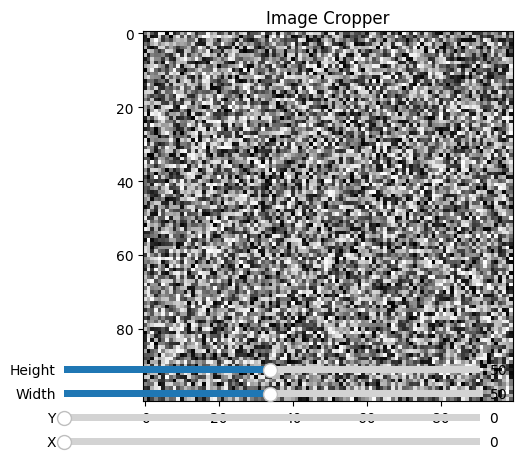

In [2]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, RectangleSelector
from matplotlib.patches import Rectangle
import numpy as np

def update_crop(val):
    x_start, x_end = slider_x.val, slider_x.val + slider_width.val
    y_start, y_end = slider_y.val, slider_y.val + slider_height.val

    rect.set_x(x_start)
    rect.set_y(y_start)
    rect.set_width(slider_width.val)
    rect.set_height(slider_height.val)

    ax.set_xlim(x_start, x_end)
    ax.set_ylim(y_start, y_end)
    fig.canvas.draw_idle()

def onselect(eclick, erelease):
    x_start, y_start = eclick.xdata, eclick.ydata
    x_end, y_end = erelease.xdata, erelease.ydata

    slider_x.set_val(x_start)
    slider_y.set_val(y_start)
    slider_width.set_val(x_end - x_start)
    slider_height.set_val(y_end - y_start)

fig, ax = plt.subplots()
ax.set_title("Image Cropper")

# Load your image here
image = np.random.random((100, 100))  # Replace this with your image data

# Display the initial image
ax.imshow(image, cmap='gray')

# Initial cropping parameters
initial_x, initial_y, initial_width, initial_height = 0, 0, 50, 50

# Create sliders
ax_slider_x = plt.axes([0.1, 0.01, 0.65, 0.03], facecolor='lightgoldenrodyellow')
ax_slider_y = plt.axes([0.1, 0.06, 0.65, 0.03], facecolor='lightgoldenrodyellow')
ax_slider_width = plt.axes([0.1, 0.11, 0.65, 0.03], facecolor='lightgoldenrodyellow')
ax_slider_height = plt.axes([0.1, 0.16, 0.65, 0.03], facecolor='lightgoldenrodyellow')

slider_x = Slider(ax_slider_x, 'X', 0, image.shape[1] - initial_width, valinit=initial_x)
slider_y = Slider(ax_slider_y, 'Y', 0, image.shape[0] - initial_height, valinit=initial_y)
slider_width = Slider(ax_slider_width, 'Width', 1, image.shape[1], valinit=initial_width)
slider_height = Slider(ax_slider_height, 'Height', 1, image.shape[0], valinit=initial_height)

slider_x.on_changed(update_crop)
slider_y.on_changed(update_crop)
slider_width.on_changed(update_crop)
slider_height.on_changed(update_crop)

# Create a rectangle selector for manual cropping
rect = RectangleSelector(ax, onselect, useblit=True, button=[1], minspanx=5, minspany=5, spancoords='pixels')

plt.show()
